# 3 - Machine Learning (ML)
*Processo de criação, treino, avaliação e validação de modelos*

![Data Preparation](./img/imagem3.jpg "Preparação dos dados")

## Objetivos

1. Preparação dos dados: Dado que já fizemos no capitulo 2 este passo já podemos avançar para a dividão dos dados
2. Divisão dos dados: Vamos neste ponto separar o conjunto de treino e o conjunto de teste.
3. Treinar modelos preditivos: A comparação de modelos (Linear Regression, Ridge, MLP, Random Forest, Gradient Boosting).
4. Validação: No fim iremos avaluiar os modelos com métricas usadas na formação MAE, MSE e R².

--- 

## 3.1 - Bibliotecas Utilizadas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
import joblib


---
## 2.2 - Dataset Treino

In [3]:

df_cleaned = pd.read_csv('./data/Life_Expectancy_Clean.csv')

## 3.2 - Preparar os Dados (Divisão do Dataset)
* Variável dependente (alvo): Life expectancy.
* Variáveis independentes (entradas): os restantes fatores.
* Dividir o dataset em treino (80%) e teste (20%).

In [4]:
from sklearn.model_selection import train_test_split

# Divisão em treino e teste
train, test = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Separar variáveis independentes e dependentes no treino
X_train = train.drop(columns=["Life expectancy"])
y_train = train["Life expectancy"]

# Separar variáveis independentes e dependentes no teste
X_test = test.drop(columns=["Life expectancy"])
y_test = test["Life expectancy"]

# Exibir tamanhos
print(f"Conjunto de Treino: {train.shape[0]} linhas, {train.shape[1]} colunas")
print(f"Conjunto de Teste: {test.shape[0]} linhas, {test.shape[1]} colunas")


Conjunto de Treino: 1490 linhas, 9 colunas
Conjunto de Teste: 373 linhas, 9 colunas


---

## 3.3 - Treinar o Modelo

Métricas para Avaliação

* MAE (Mean Absolute Error):
Mede a média da diferença entre o valor real com o predito

* MSE (Mean Squared Error):
Calcula a média de diferença entre o valor predito com o real

* R² Score:
Representa o percentual da variância dos dados que é explicado pelo modelo.

In [5]:
# Treinar e avaliar modelos
def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    """
    Treina e avalia um modelo com métricas comuns de regressão.
    
    Parâmetros:
    - model: Instância do modelo.
    - model_name: Nome do modelo (str).
    - X_train, y_train: Dados de treino.
    - X_test, y_test: Dados de teste.
    
    Retorno:
    - Dicionário com os resultados de avaliação.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return {
        "Model": model_name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
    }

In [6]:
# Lista de modelos a serem avaliados
models = [
    (MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42), "Deep Learning (MLPRegressor)"),
    (GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), "Gradient Boosting Machine (GBM)"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Distributed Random Forest (DRF)"),
    (Ridge(alpha=1.0, random_state=42), "Generalized Linear Model (GLM)"),
]

Resultados Obtidos:
                             Model       MAE        MSE        R²
0     Deep Learning (MLPRegressor)  4.483903  35.983905  0.475138
1  Gradient Boosting Machine (GBM)  2.971865  16.618062  0.757609
2  Distributed Random Forest (DRF)  2.334638  11.980792  0.825248
3   Generalized Linear Model (GLM)  4.240932  34.584726  0.495546


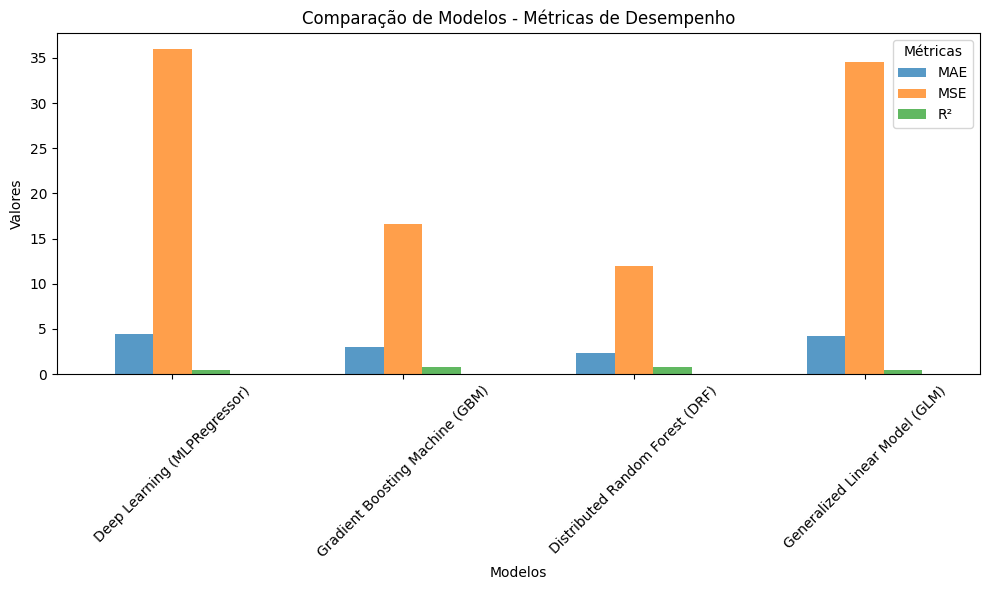

In [7]:
# Avaliar todos os modelos
results = []
for model, name in models:
    results.append(train_and_evaluate(model, name, X_train, y_train, X_test, y_test))

# Exibir os resultados como DataFrame para facilitar a comparação
results_df = pd.DataFrame(results)
print("Resultados Obtidos:")
print(results_df)

# Gráfico comparativo dos resultados
results_df.set_index("Model", inplace=True)
results_df.plot(kind="bar", figsize=(10, 6), rot=45, alpha=0.75)
plt.title("Comparação de Modelos - Métricas de Desempenho")
plt.ylabel("Valores")
plt.xlabel("Modelos")
plt.legend(title="Métricas")
plt.tight_layout()
plt.show()

# Distributed Random Forest (DRF) vs. Gradient Boosting Machine (GBM) 

1. Para o probelma "Como os Fatores Socioeconómicos Influenciam a Expectativa de Vida?" vamos usar o **modelo DRF**
2. Para o problema "Qual o Impacto das Taxas de Vacinação na Mortalidade Infantil e Expectativa de Vida?" vamos usar o **modelo GBM**

--- 

# 3.4 - Como os Fatores Socioeconómicos Influenciam a Expectativa de Vida?

Impacto dos Fatores Socioeconômicos no Desempenho
Mean Absolute Error (MAE): 2.40
Mean Squared Error (MSE): 12.65
R² Score: 0.82


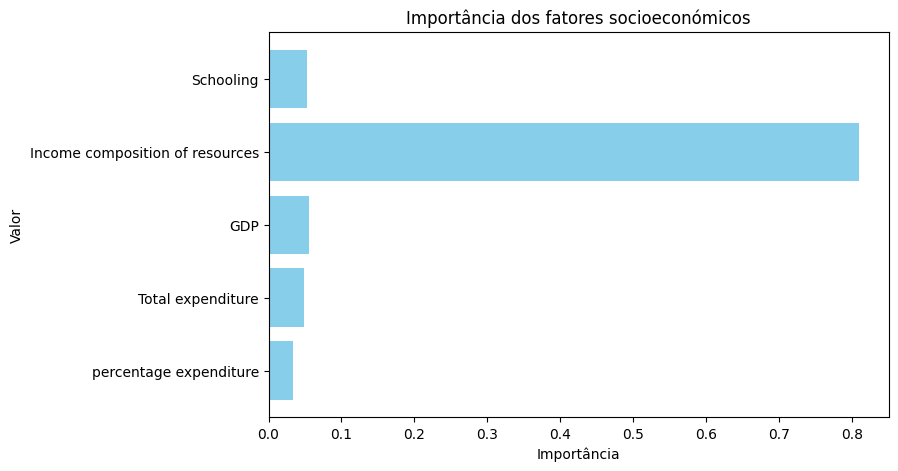

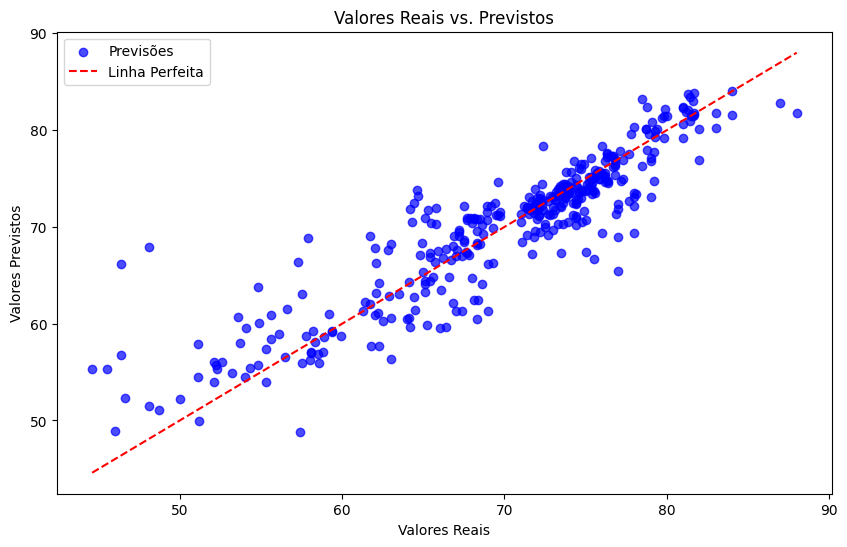

In [8]:
# Definir as variáveis independentes (Taxas de vacinação)
Train = X_train[['percentage expenditure', 'Total expenditure', 'GDP', 'Income composition of resources', 'Schooling']]
Target = y_train

# Testar no conjunto de teste
Test = X_test[['percentage expenditure', 'Total expenditure', 'GDP', 'Income composition of resources', 'Schooling']]
Test_Target = y_test

# Treinar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(Train, Target)

# Fazer previsões
y_pred = model.predict(Test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Avaliar o desempenho
mae = mean_absolute_error(Test_Target, y_pred)
mse = mean_squared_error(Test_Target, y_pred)
r2 = r2_score(Test_Target, y_pred)

# Exibir os resultados de forma clara e organizada
print("="*50)
print("Impacto dos Fatores Socioeconômicos no Desempenho")
print("="*50)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("="*50)


# Importância das Variáveis
feature_importance = model.feature_importances_
features = Train.columns

plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.title("Importância dos fatores socioeconómicos")
plt.xlabel("Importância")
plt.ylabel("Valor")
plt.show()

# Gráfico de Valores Reais vs. Previstos
plt.figure(figsize=(10, 6))
plt.scatter(Test_Target, y_pred, alpha=0.7, color="blue", label="Previsões")
plt.plot([min(Test_Target), max(Test_Target)], [min(Test_Target), max(Test_Target)], '--', color='red', label="Linha Perfeita")
plt.title("Valores Reais vs. Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.legend()
plt.show()

--- 

# 3.5 - Qual o Impacto das Taxas de Vacinação na Mortalidade Infantil e Expectativa de Vida?

Impacto das Taxas de Vacinação (Gradient Boosting Machine):
Mean Absolute Error (MAE): 5.41
Mean Squared Error (MSE): 52.38
R² Score: 0.24


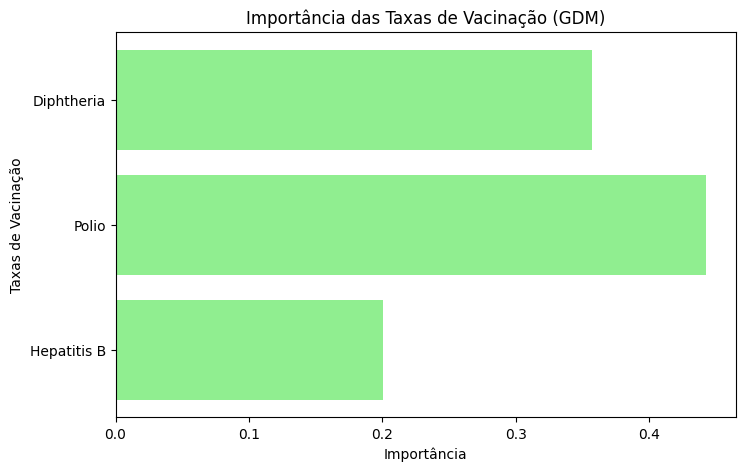

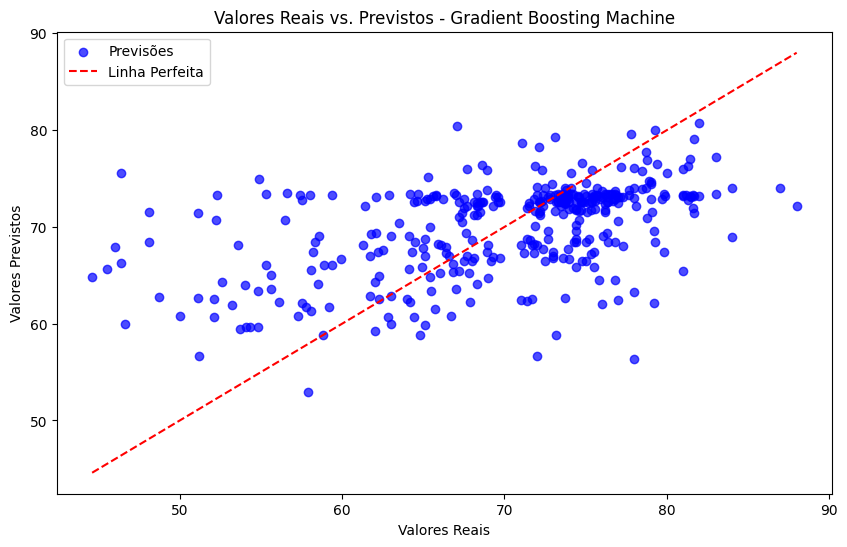

In [9]:

# Definir as variáveis independentes (Taxas de vacinação)
Train = X_train[['Hepatitis B', 'Polio', 'Diphtheria']]
Target = y_train

# Testar no conjunto de teste
Test = X_test[['Hepatitis B', 'Polio', 'Diphtheria']]
Test_Target = y_test

# Treinar o modelo Gradient Boosting Machine (GDM)
model_gdm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gdm.fit(Train, Target)

# Fazer previsões
y_pred_gdm = model_gdm.predict(Test)

# Avaliar o desempenho
mae_gdm = mean_absolute_error(Test_Target, y_pred_gdm)
mse_gdm = mean_squared_error(Test_Target, y_pred_gdm)
r2_gdm = r2_score(Test_Target, y_pred_gdm)

# Exibir os resultados de forma clara e organizada
print("="*50)
print("Impacto das Taxas de Vacinação (Gradient Boosting Machine):")
print("="*50)
print(f"Mean Absolute Error (MAE): {mae_gdm:.2f}")
print(f"Mean Squared Error (MSE): {mse_gdm:.2f}")
print(f"R² Score: {r2_gdm:.2f}")
print("="*50)

# Importância das Variáveis
feature_importance_gdm = model_gdm.feature_importances_
features = Train.columns

plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance_gdm, color='lightgreen')
plt.title("Importância das Taxas de Vacinação (GDM)")
plt.xlabel("Importância")
plt.ylabel("Taxas de Vacinação")
plt.show()

# Gráfico de Valores Reais vs. Previstos
plt.figure(figsize=(10, 6))
plt.scatter(Test_Target, y_pred_gdm, alpha=0.7, color="blue", label="Previsões")
plt.plot([min(Test_Target), max(Test_Target)], [min(Test_Target), max(Test_Target)], '--', color='red', label="Linha Perfeita")
plt.title("Valores Reais vs. Previstos - Gradient Boosting Machine")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.legend()
plt.show()




## 3.4 - Guardar dataset_Treino


In [10]:
# Guardar os datasets de treino e teste
def save_datasets(train_df, test_df, train_path, test_path):

# guardar os datasets
    train_df.to_csv(train_path, index=False)
    test_df.to_csv(test_path, index=False)
    
# Exibir os caminhos dos arquivos salvos
    return train_path, test_path

# Usar a função para guardar os datasets
train_path = './data/Life_Expectancy_Treino.csv'
test_path = './data/Life_Expectancy_Test.csv'
save_datasets(X_train, X_test, train_path, test_path)


('./data/Life_Expectancy_Treino.csv', './data/Life_Expectancy_Test.csv')